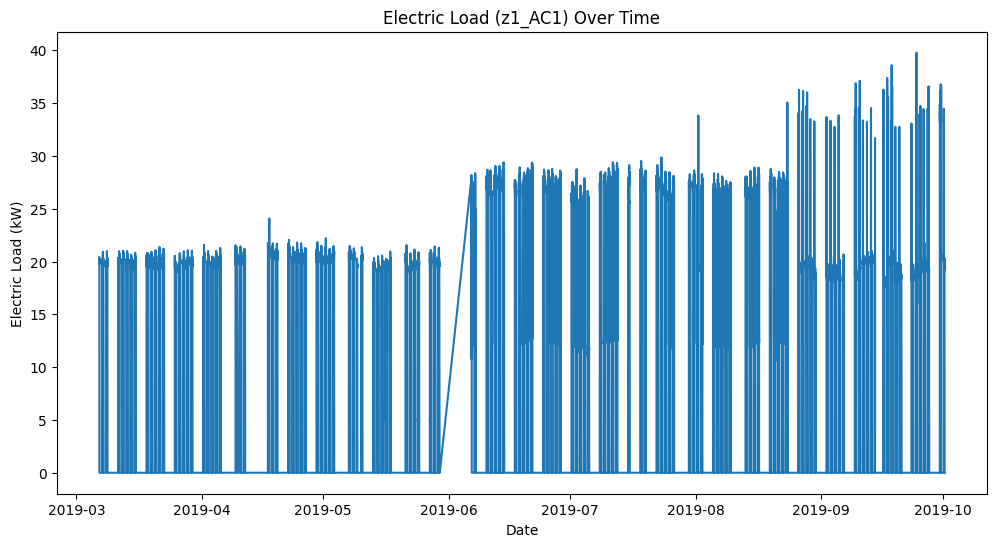

Mean Squared Error (MSE): 0.49
R-squared (R2): 0.99
Predictions for the new data:
[-3.7541893e-05 -3.7541893e-05 -3.7541893e-05 -3.7541893e-05
 -3.7541893e-05]


In [13]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data loading
outer_zip_path = '/content/Group_F_Electric_Load_Prediction.zip'
inner_zip_name = 'Data_2019.zip'
csv_file_name = 'Data_2019/2019Floor6.csv'

with zipfile.ZipFile(outer_zip_path, 'r') as outer_zf:
    with outer_zf.open(inner_zip_name, 'r') as inner_zf:
        inner_zip_content = inner_zf.read()

temp_inner_zip_path = '/tmp/Data_2019.zip'
with open(temp_inner_zip_path, 'wb') as f:
    f.write(inner_zip_content)

with zipfile.ZipFile(temp_inner_zip_path, 'r') as inner_zf:
    with inner_zf.open(csv_file_name) as f:
        df = pd.read_csv(f)

# Data exploration and preprocessing
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)

df['hour'] = df['Date'].dt.hour
df['dayofweek'] = df['Date'].dt.dayofweek
df['month'] = df['Date'].dt.month

features = ['z1_AC1(kW)', 'z1_Light(kW)', 'z1_Plug(kW)', 'z1_S1(degC)', 'z1_S1(RH%)', 'z1_S1(lux)',
            'z2_AC1(kW)', 'z2_Light(kW)', 'z2_Plug(kW)', 'z2_S1(degC)', 'z2_S1(RH%)', 'z2_S1(lux)',
            'z3_Light(kW)', 'z3_Plug(kW)',
            'z4_AC1(kW)', 'z4_AC2(kW)', 'z4_AC3(kW)', 'z4_AC4(kW)', 'z4_Light(kW)', 'z4_Plug(kW)', 'z4_S1(degC)', 'z4_S1(RH%)', 'z4_S1(lux)',
            'z5_AC1(kW)', 'z5_Light(kW)', 'z5_Plug(kW)', 'z5_S1(degC)', 'z5_S1(RH%)', 'z5_S1(lux)',
            'hour', 'dayofweek', 'month']
target = 'z1_AC1(kW)'

X = df[features]
y = df[target]

train_size = 0.8
split_index = int(len(df) * train_size)

X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['z1_AC1(kW)'])
plt.title('Electric Load (z1_AC1) Over Time')
plt.xlabel('Date')
plt.ylabel('Electric Load (kW)')
plt.show()

# Model selection and training
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

# Model evaluation
y_pred = xgb_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Prediction
new_data = X_test.head(5)
new_data_scaled = scaler.transform(new_data)
new_predictions = xgb_model.predict(new_data_scaled)

print("Predictions for the new data:")
print(new_predictions)